In [81]:
%matplotlib notebook
import numpy as np
import sympy as smp
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import animation
from matplotlib.animation import PillowWriter
plt.style.use(['science','notebook'])

In [51]:
#Problem 1: find the probability that a photon scatters at angle theta
#Part A: compute d_sigma/d_theta
#Part B: compute sigma
#Part C: use d_sigma/d_theta and sigma to find probability density function f(theta)

In [52]:
#Define variables
theta, alpha = smp.symbols(r'\theta \alpha', real=True, positive=True)
dsdo = smp.Rational(1,2)*(1+smp.cos(theta)**2)/(1+alpha*(1-smp.cos(theta)))**2 * \
            ( 1 + alpha**2 * (1-smp.cos(theta))**2 / ((1+smp.cos(theta)**2)*(1+alpha*(1-smp.cos(theta)))))
dsdo
#Compute d_sigma/d_theta
dsdt = 2*smp.pi*dsdo*smp.sin(theta)
dsdt = dsdt.simplify()
dsdt

pi*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*sin(\theta)/(\alpha*(cos(\theta) - 1) - 1)**3

In [53]:
#Compute sigma
s = smp.integrate(dsdt, (theta, 0, smp.pi))
s = s.simplify().simplify()
s

pi*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1))/(\alpha**3*(4*\alpha**2 + 4*\alpha + 1))

In [54]:
#Compute probability density function of theta
pdf_theta = dsdt / s
pdf_theta = pdf_theta.simplify()
pdf_theta

-\alpha**3*(\alpha**2*(cos(\theta) - 1)**2 - (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)*sin(\theta)/((\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

In [55]:
#Can also get pdf over the whole sphere
pdf_omega = dsdo / s
pdf_omega = pdf_omega.simplify()
pdf_omega

\alpha**3*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(2*pi*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

In [56]:
#Plotting
pdf_theta_f = smp.lambdify([theta,alpha], pdf_theta)
pdf_omega_f = smp.lambdify([theta,alpha], pdf_omega)

In [85]:
#Using alpha=2
theta = np.linspace(0, np.pi, 1000)
pdf_t = pdf_theta_f(theta, .1)
pdf_o = pdf_omega_f(theta,.1)

<IPython.core.display.Javascript object>


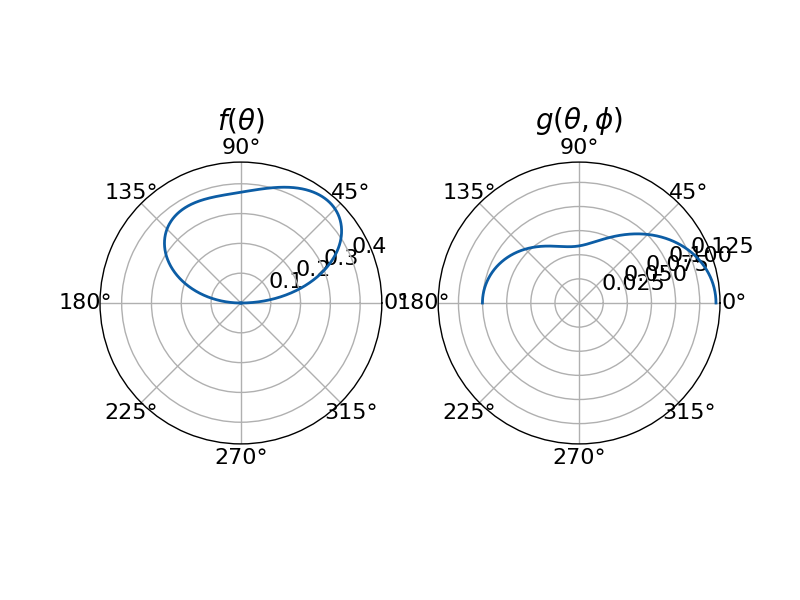

In [86]:
fig, axes = plt.subplots(1,2,subplot_kw={'projection': 'polar'})
axes[0].plot(theta, pdf_t)
axes[0].set_title(r'$f(\theta)$', fontsize=20)
axes[1].plot(theta, pdf_o)
axes[1].set_title(r'$g(\theta, \phi)$', fontsize=20)
plt.show()

In [98]:
#3D plot of PDFs

theta, phi = np.linspace(0, np.pi, 1000), np.linspace(0, 2 * np.pi, 1000)
# Create the mesh in polar coordinates and compute corresponding Z.
THETA, PHI = np.meshgrid(theta, phi)

# Express the mesh in the cartesian system.
R = pdf_o
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)

d = np.sqrt(X**2+Y**2+Z**2)
d = d/d.max()

#3D Plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(Z, Y, X,facecolors=plt.cm.seismic(d), linewidth=0, antialiased=False)

# Add a color bar which maps values to colors.
m = cm.ScalarMappable(cmap=plt.cm.seismic, norm=d)
m.set_array([])
plt.colorbar(m)

plt.show()

<IPython.core.display.Javascript object>

TypeError: 'norm' must be an instance of matplotlib.colors.Normalize or None, not a numpy.ndarray

In [43]:
np.size(Z)

1600

In [50]:
#Animation for multiple alphas
theta = np.linspace(0, np.pi, 1000)
alphas = 10.0** np.linspace(-3,4,300)
pdfs = [pdf_theta_f(theta, alpha) for alpha in alphas]

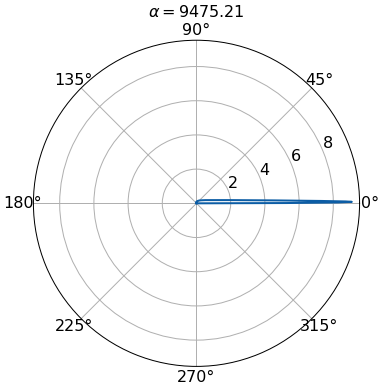

In [51]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ln, = plt.plot([], [])

def animate(i):
    ax.clear()
    ax.plot(theta, pdfs[i])
    ax.set_title(r'$\alpha=$'+f'{alphas[i]:.2f}')
    
ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
ani.save('ProbabilityDensityFunction-theta.gif',writer='pillow',fps=30,dpi=100)

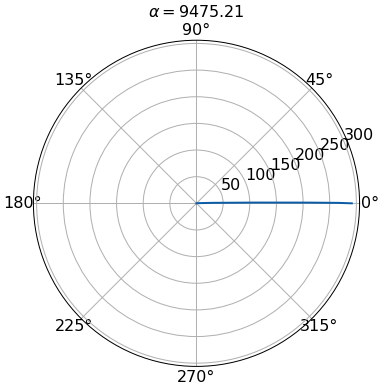

In [22]:
pdfs_omega = [pdf_omega_f(theta, alpha) for alpha in alphas]
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ln, = plt.plot([], [])

def animate(i):
    ax.clear()
    ax.plot(theta, pdfs_omega[i])
    ax.set_title(r'$\alpha=$'+f'{alphas[i]:.2f}')
    
ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
ani.save('ProbabilityDensityFunction-omega.gif',writer='pillow',fps=30,dpi=100)

In [23]:
#Problem 2: probability density function of photon and electron post interaction
#Part A: outgoing photon energy E'
#Part B: outgoing electron energy T = E - E'

In [24]:
E, Ep, alpha, T, theta = smp.symbols(r"E E' \alpha T \theta", real=True, positive=True)

In [25]:
Ep_expr = E/(1+alpha*(1-smp.cos(theta)))
Ep_expr

E/(\alpha*(1 - cos(\theta)) + 1)

In [28]:
theta_expr = smp.solve(Ep-Ep_expr, theta)[1]
theta_expr

acos((-E + E'*\alpha + E')/(E'*\alpha))

In [29]:
pdf_Ep = 1/s * dsdt / smp.diff(Ep_expr, theta)
pdf_Ep

-\alpha**2*(\alpha*(1 - cos(\theta)) + 1)**2*(-\alpha**2*(cos(\theta) - 1)**2 + (\alpha*(cos(\theta) - 1) - 1)*(cos(\theta)**2 + 1))*(4*\alpha**2 + 4*\alpha + 1)/(E*(\alpha*(cos(\theta) - 1) - 1)**3*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha + (4*\alpha**4 - 4*\alpha**3 - 15*\alpha**2 - 10*\alpha - 2)*log(2*\alpha + 1)))

In [30]:
pdf_Ep = pdf_Ep.subs(theta, theta_expr).simplify()
pdf_Ep

-(E*(E'**2*\alpha**2 + (-E + E'*\alpha + E')**2) + E'*\alpha**2*(E - E')**2)*(4*\alpha**2 + 4*\alpha + 1)/(E**2*E'**2*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

In [31]:
smp.integrate(pdf_Ep, (Ep, E, E/(1+2*alpha))).simplify()

1

In [32]:
T_expr = E*alpha*(1-smp.cos(theta))/(1+alpha*(1-smp.cos(theta)))
theta_expr = smp.solve(T-T_expr, theta)[1]
pdf_T = 1/s * dsdt / smp.diff(T_expr, theta)
pdf_T = pdf_T.subs(theta, theta_expr).simplify()
pdf_T

(\alpha**2*(E - T)*(-E*\alpha + T*\alpha + T + \alpha*(E - T))**2 - (\alpha**2*(E - T)**2 + (-E*\alpha + T*\alpha + T)**2)*(E*\alpha - E - T*\alpha - \alpha*(E - T)))*(4*\alpha**2 + 4*\alpha + 1)/(E*(-E + T)**2*(-E*\alpha + E + T*\alpha + \alpha*(E - T))*(2*\alpha**4 + 18*\alpha**3 + 16*\alpha**2 + 4*\alpha - (-4*\alpha**4 + 4*\alpha**3 + 15*\alpha**2 + 10*\alpha + 2)*log(2*\alpha + 1)))

In [33]:
smp.integrate(pdf_T, (T, 0, 2*E*alpha/(1+2*alpha))).simplify()

1

In [34]:
pdf_Ep_f = smp.lambdify([Ep, E, alpha], pdf_Ep)
pdf_T_f = smp.lambdify([T, E, alpha], pdf_T)

In [54]:
m = 0.511
alpha = 1
E = alpha*m
Ep = np.linspace(E/(1+2*alpha), E, 1000)
T = np.linspace(0, 2*E*alpha/(1+2*alpha), 1000)

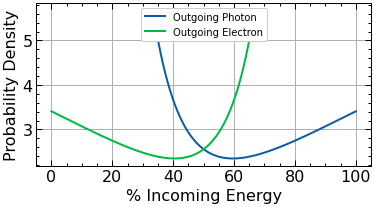

In [55]:
plt.figure(figsize=(6,3))
plt.plot(100*Ep/(E), -pdf_Ep_f(Ep, E, alpha), label='Outgoing Photon')
plt.plot(100*T/(E), pdf_T_f(T, E, alpha), label='Outgoing Electron')
plt.xlabel('% Incoming Energy')
plt.ylabel('Probability Density')
plt.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
plt.grid()
plt.savefig('EnergyPDFs.png', dpi=200)
plt.show()

In [47]:
alphas = 10.0** np.linspace(-3,4,300)
Eps = [np.linspace(alpha*m/(1+2*alpha), alpha*m, 1000) for alpha in alphas]
Ts = [np.linspace(0, 2*alpha*m*alpha/(1+2*alpha), 1000) for alpha in alphas]
pdfs_Ep = [-pdf_Ep_f(Ep, alpha*m, alpha) for (alpha, Ep) in zip(alphas, Eps)]
pdfs_T = [pdf_T_f(T, alpha*m, alpha) for (alpha, T) in zip(alphas, Ts)]

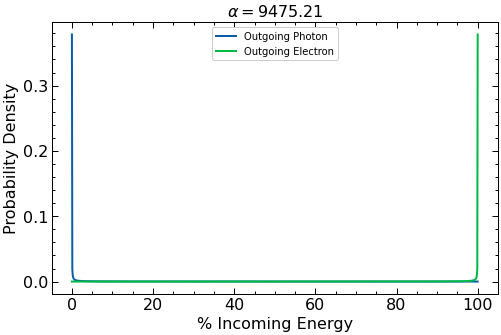

In [48]:
fig, ax = plt.subplots(figsize=(8,5))

def animate(i):
    alpha = alphas[i]; Ep=Eps[i]; T = Ts[i]
    E = m*alpha
    ax.clear()
    ax.plot(100*Ep/E, -pdf_Ep_f(Ep, E, alpha), label='Outgoing Photon')
    ax.plot(100*T/E, pdf_T_f(T, E, alpha), label='Outgoing Electron')
    ax.set_xlabel('% Incoming Energy')
    ax.set_ylabel('Probability Density')
    ax.legend(ncol=1, fontsize=10, facecolor='white', framealpha=1, frameon=True, loc='upper center')
    ax.set_title(r'$\alpha=$'+f'{alpha:.2f}')
    
ani = animation.FuncAnimation(fig, animate, frames=299, interval=50)
ani.save('EnergyPDFs.gif',writer='pillow',fps=30,dpi=100)